### IDs:
Insert yours IDs to the cell below

ID #1: 312146343

ID #2: 806761


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import random

sns.set()

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---
#### 1.1 Describe the dataset
Q: How many samples does it contain?  
A: There are 506 pieces of samples.

In [7]:
len(df)

506

Q: How many features?  
A: There are 14 features.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Q: What is the data type for each variable?  
A: float64

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


---
#### 1.2 Produce a histogram and a boxplot of the nitric oxides concentration. Describe the distribution.
We can tell from the histogram that the number of record which NOX bewtween 0.4-0.5 and 0.5-0.6 are more than others.  
From boxplot, we can tell the median of NOX is around 0.5-0.55. The 50% of the record is between 0.45-0.63. The min and max of the record are around 0.38 and 0.9. There is no outliers.

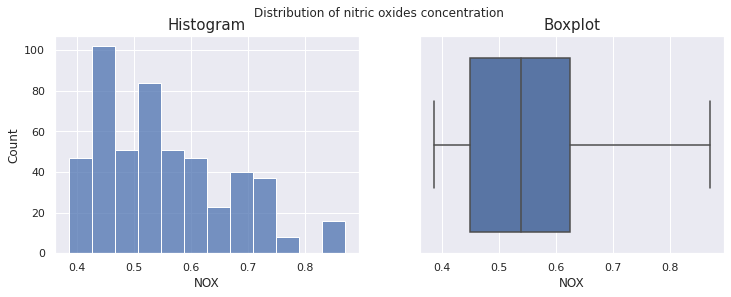

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data = df, x = 'NOX', ax = ax[0])
sns.boxplot(data = df, x = 'NOX', ax = ax[1])
plt.suptitle('Distribution of nitric oxides concentration')
ax[0].set_title('Histogram', fontdict={'fontsize': 15})
ax[1].set_title('Boxplot', fontdict={'fontsize': 15})
plt.show()

---
#### 1.3 Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
From the heatmap, we can see corr(TAX, RAD)=0.91, which means TAX and RAD are highly positive correlation.
DIS is partial negative correlation with INDUS, NOX, AGE respectively.  
We speculate that row number 4 (CHAS) is an outlier, the feature with unusual behaviour, because it has almost zero correlation with everything else.

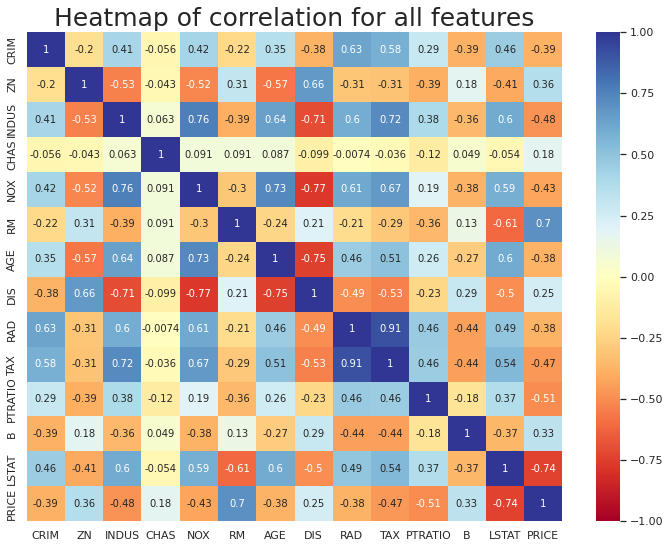

In [12]:
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "RdYlBu", annot=True)
plt.title('Heatmap of correlation for all features', fontdict={'fontsize': 25})
plt.show()

---
#### 1.4 Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 

In [13]:
def get_corr_features(df, n):
    abs_df = abs(df.corr())
    max_corr = abs_df.stack().nlargest(len(abs_df) + 2*n)
    return dict(zip(list(max_corr[len(abs_df):].index)[::2], list(max_corr[len(abs_df):].values)[::2]))

We can find the correlative features:

In [14]:
corr_features = get_corr_features(df, 2)
corr_features

{('RAD', 'TAX'): 0.9102281885331865, ('NOX', 'DIS'): 0.7692301132258282}

Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

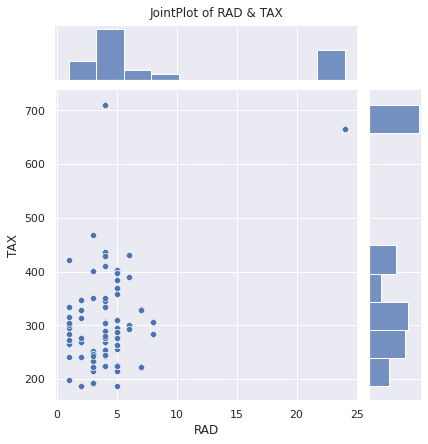

In [15]:
sns.jointplot(data=df, x=list(corr_features.keys())[0][0], y=list(corr_features.keys())[0][1])
plt.suptitle('JointPlot of RAD & TAX', y = 1.02)
plt.show()

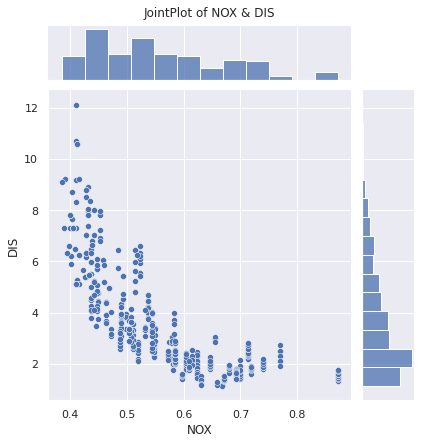

In [16]:
sns.jointplot(data=df, x=list(corr_features.keys())[1][0], y=list(corr_features.keys())[1][1])
plt.suptitle('JointPlot of NOX & DIS', y = 1.02)
plt.show()

---
#### 1.5 Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

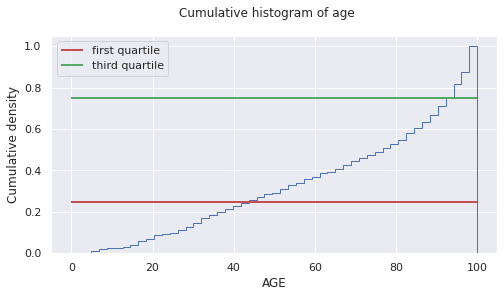

In [17]:
quantiles = df['AGE'].quantile([0.25,0.75])
q1 = quantiles.values[0]
q3 = quantiles.values[1]

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(df['AGE'], 50, density=True, histtype='step', cumulative=True)
ax.hlines(y=0.25, xmin=0, xmax=100, linewidth=2, color='r', label='first quartile')
ax.hlines(y=0.75, xmin=0, xmax=100, linewidth=2, color='g', label='third quartile')

ax.set_xlabel('AGE')
ax.set_ylabel('Cumulative density')
plt.suptitle('Cumulative histogram of age')
plt.legend(loc='upper left')
plt.show()

---
#### 1.6 Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

Identify and report 2 “interesting” trends in the data. No need to provide statistical confide

First interesting point: features have a correlation to the target!

To test this, We will test the mean_squared_error of random forest model VS mean of random guess 20 times.

random guess:

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df.drop('PRICE', axis = 1), df['PRICE'], test_size=0.33, random_state=42)
rg_mse = np.mean([mean_squared_error(y_test, np.random.randint(0, max(df['PRICE']), len(X_test))) for i in range(20)])
rg_mse

285.924371257485

random forest:

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf.predict(X_test))
rf_mse

11.111952538922154

In [20]:
rg_mse/rf_mse

25.73124482452292

It can see that the correlation is 29 times higher than an average random guess

The second interesting point: Half the correlation to the target is mainly based on only two features only!

In [21]:
fi = pd.DataFrame(dict(zip(list(X_test.columns),list(rf.feature_importances_))), index=['feature_importances']).T.sort_values(by = 'feature_importances')
fi

,feature_importances
CHAS,0.000547
ZN,0.003397
RAD,0.006607
INDUS,0.006638
TAX,0.008639
NOX,0.012849
B,0.012976
AGE,0.016038
PTRATIO,0.016114
CRIM,0.035910


In [22]:
list_most_feature_importances = list(fi.loc[fi['feature_importances']>0.1].index)
list_most_feature_importances

['RM', 'LSTAT']

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train[list_most_feature_importances], y_train)
rf_fi_mse = mean_squared_error(y_test, rf.predict(X_test[list_most_feature_importances]))
rf_fi_mse

21.515580215568857

In [24]:
rg_mse/rf_fi_mse

13.289177814065535

It can see that the correlation is 14 times higher than an average random guess

Using all the features resulted in a double result in only two

---
### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

Because we do not know whether the variables 𝑋,𝑌 and 𝑍 are dependent or independent therefore to define the joint distribution of 𝑋,𝑌 and 𝑍 we need the probability of each combination of them (Except for the last combination which we can calculate by ourselves)

So we expect a result that will be: $k*m*n-1=4mn-1$

In [25]:
def num_joint_dist_params(n,m,k):
    return n*k*m-1

For example, if we knew that n=4 & m=4, The result was:

In [26]:
num_joint_dist_params(n = 4 ,m = 4, k= 4)

63

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Because we know the variables 𝑋,𝑌 and 𝑍 are independent, therefore to define the joint distribution of 𝑋,𝑌 and 𝑍 we dont need the probability of each combination of them because $p(x\cup y \cup z) = p(x)\cdot p(y) \cdot z(y)$

So we expect a result that will be: $ (n-1)+(m-1)+ (4 - 1) = n + m + 1 $ 

In [27]:
def num_joint_dist_params_independent(n,m,k):
    return n-1+m-1+k-1

For example, if we knew that n=4 & m=4, The result was:

In [28]:
num_joint_dist_params_independent(n = 4 ,m = 4, k= 4)

9

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

In that case we must to know all the params of $ p(x\cup z) , p(y \cup z), p(z)$

So we expect a result that will be: $(4n-1) + (4m-1) + (4-1) = 4n + 4m + 1$

In [29]:
def num_joint_dist_params_independent_given_Z(n,m,k):
    return (k*n-1) + (k*m-1) + (k-1)

For example, if we knew that n=4 & m=4, The result was:

In [30]:
num_joint_dist_params_independent_given_Z(4, 4, 4)

33

It is possible to see that when all the variables could be dependent (section A) we would need the maximum number of parameters.

When all variables were independent (section B), we needed the minimum amount of parameters.

When two variables were independent given a third variable (section C), we needed a medium amount of parameters.


#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

In essence, conditional dependence probability is influenced from information about the possible occurrence of an event:

$U ~ N(0,1)$

$V ~ N(0,1)$

$W ~ Does ~ U+V > 0.5$

If W = 1: U+V >0.5

If W = 0: U+V <=0.5

**U & V are (unconditionally) independent.**
- Both are independent random variables

**𝑈  and  𝑉  are NOT conditionally independent (Conditional dependence) given 𝑊:**
- If W = 1: 
    - P(V>0.5) < P(V>0.5 | U > 0.5)
    - P(U>0.5) < P(U>0.5 | V > 0.5)
- If W = 0: 
    - P(V<0.5) < P(V<0.5 | U < 0.5)
    - P(U<0.5) < P(U<0.5 | V < 0.5)    
    
This example is based on the classic case of conditional dependence while adjusting to the variables defined in the question:

Let the event A be 'I have a new phone'; event B be 'I have a new watch'; and event C be 'I am happy'; and suppose that having either a new phone or a new watch increases the probability of my being happy. 

Let us assume that the event C has occurred – meaning 'I am happy'. 

Now if another person sees my new watch, he/she will reason that my likelihood of being happy was increased by my new watch, so there is less need to attribute my happiness to a new phone.

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [32]:
df = pd.read_csv("GMD.csv", index_col=0, header = None)

#### First method - MLE
For the histogram, we can tell there are three peaks at $x = 4$, $x = 9$ and $x = 15$, which corresponded with the mean of three different Gaussian distribution. Since $\mu_{1}=4, \mu_{2}=9$, we can easily estimate $\mu_{3}=15$.  
Now we have only one unknown parameter $w_1$, we can use MLE to estimate it.

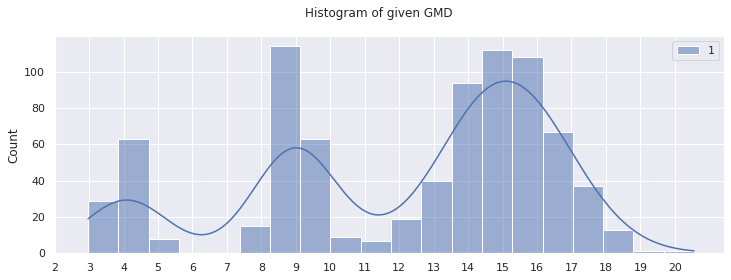

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data = df, kde = True, bins = 20)

plt.suptitle('Histogram of given GMD')
plt.xticks(np.arange(2,21))
plt.show()

---
#### Second method - EM

In [34]:
#initial data
loc1 = 4
loc2 = 9
scale1 = scale2 = 0.5
scale3 = 1.5
w2 = 0.25

#guess
w1 = 0.5
loc3 = 0

w3 = 1 - w1 - w2

#get x value from provided GMD.csv
x=np.array(df)

In [35]:
for i in range(1000):
    #E part
    d1 = stats.norm(loc=loc1, scale=scale1)
    d2 = stats.norm(loc=loc2, scale=scale2)
    d3 = stats.norm(loc=loc3, scale=scale3)

    #calculate responsibilities
    r_d1 = w1*d1.pdf(x)
    r_d2 = w2*d2.pdf(x)
    r_d3 = w3*d3.pdf(x)
    r = r_d1+r_d2+r_d3

    r_d1 = r_d1/r
    r_d2 = r_d2/r
    r_d3 = r_d3/r

    #update new parameter
    w1 = r_d1.mean()
    w3 = 1 - w2 - w1
    loc3 = 1/w3*((r_d3*x).mean())

#output the result
print(f'''mu3 = {round(loc3,2)}\nw1 = {round(w1,3)}\nw3 = {round(w3,3)}''')

mu3 = 15.11
w1 = 0.125
w3 = 0.625


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

/dsp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


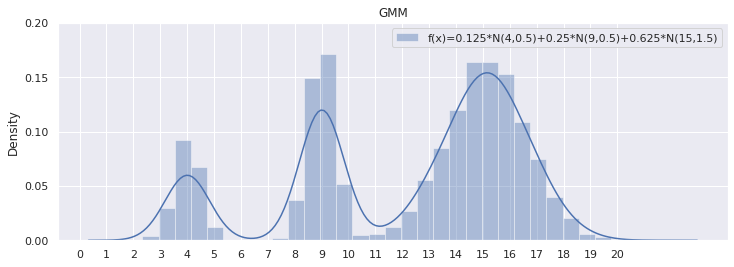

In [36]:
#initial data
loc1 = 4
loc2 = 9
scale1 = scale2 = 0.5
scale3 = 1.5
w2 = 0.25
loc3 = 15.11
w1 = 0.125
w3 = 0.625
# generate 3 gaussians
d1 = stats.norm.rvs(loc=loc1, scale=scale1, size=10000)
d2 = stats.norm.rvs(loc=loc2, scale=scale2, size=10000)
d3 = stats.norm.rvs(loc=loc3, scale=scale3, size=10000)
# create the gmm data}
gmm_data = []
for i in range(10000):
    p = stats.uniform.rvs(size=1)
    if p < w1:
        gmm_data.append(np.random.choice(a=d1, size=1))
    elif p < (w1+w2):
        gmm_data.append(np.random.choice(a=d2, size=1))
    else:
        gmm_data.append(np.random.choice(a=d3, size=1))
# plot gmm.
label_gmm = 'f(x)={}*N({},{})+{}*N({},{})+{}*N({},{})'.format(w1,loc1,scale1,w2,loc2,scale2,w3,int(loc3),scale3)
fig = plt.figure(figsize=(12, 4))
sns.distplot(gmm_data, label=label_gmm)
plt.title('GMM')
plt.legend()
plt.xticks(np.arange(0,21))
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

##### Use EM to estimate

In [48]:
#initial data
loc1 = 4
loc2 = 9
scale1 = scale2 = 0.5
scale3 = 1.5
w2 = 0.25

#guess
loc3 = 15
loc4 = 15
scale4 = 2
w1 = 0.3
w4 = 0.1

w3 = 1 - w1 - w2 - w4

#get x value from provided GMD.csv
x=np.array(df)

for i in range(10):
    #E part
    d1 = stats.norm(loc=loc1, scale=scale1)
    d2 = stats.norm(loc=loc2, scale=scale2)
    d3 = stats.norm(loc=loc3, scale=scale3)
    d4 = stats.norm(loc=loc4, scale=scale4)

    #calculate responsibilities
    r_d1 = w1*d1.pdf(x)
    r_d2 = w2*d2.pdf(x)
    r_d3 = w3*d3.pdf(x)
    r_d4 = w4*d4.pdf(x)
    r = r_d1+r_d2+r_d3+r_d4

    r_d1 = r_d1/r
    r_d2 = r_d2/r
    r_d3 = r_d3/r
    r_d4 = r_d4/r

    #update new parameter
    w1 = r_d1.mean()
    w4 = r_d4.mean()
    w3 = 1 - w2 - w1 - w4
    loc3 = 1/w3*((r_d3*x).mean())
    loc4 = 1/w4*((r_d4*x).mean())
    scale4 = math.sqrt(1/w4*((r_d4*(x-loc4)**2).mean()))

w1 = round(w1, 3)
w3 = round(w3, 3)
w4 = round(w4, 3)
loc3 = round(loc3, 1)
loc4 = round(loc4, 1)
scale4 = round(scale4, 2)
print('w1={}, loc1={}, scale1={}\nw2={}, loc2={}, scale2={}\nw3={}, loc3={}, scale3={}\nw4={}, loc4={}, scale4={}'.format(w1,loc1,scale1,w2,loc2,scale2,w3,loc3,scale3,w4,loc4,scale4))

w1=0.125, loc1=4, scale1=0.5
w2=0.25, loc2=9, scale2=0.5
w3=0.493, loc3=15.2, scale3=1.5
w4=0.132, loc4=14.9, scale4=1.59


#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

In [49]:
#set the parameters
loc1, loc2, loc3 = 3, 7, 10
scale1, scale2, scale3 = 1, 1, 1
w1, w2, w3 = 1/3, 1/3, 1/3

##### One way is generating the data from three Gaussian distribution sperately. Then using numpy to concatenate data.  
  
##### The other way is using definition of GMM. First we choose one Gaussian distribution by their own weight(probability), then pick one point from that distribution.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


/dsp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Concatenated Distributions')

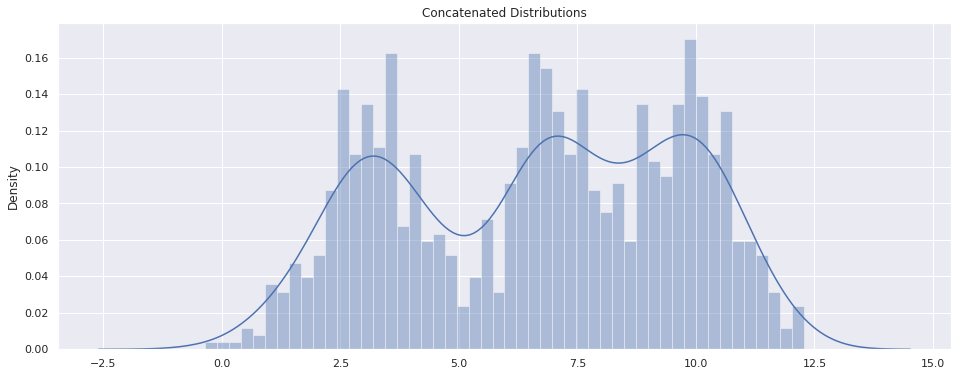

In [50]:
#way1--concatenate

d1 = stats.norm.rvs(loc=loc1, scale=scale1, size=333)
d2 = stats.norm.rvs(loc=loc2, scale=scale2, size=333)
d3 = stats.norm.rvs(loc=loc3, scale=scale3, size=334)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
concated_arrays = np.concatenate([d1,d2,d3])
sns.distplot(concated_arrays, bins=50)
ax.set_title('Concatenated Distributions')

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

In [51]:
#way2--GMM
# create the gmm data}
gmm_data = []
for i in range(1000):
    p = stats.uniform.rvs(size=1)
    if p < w1:
        gmm_data.append(np.random.choice(a=d1, size=1))
    elif p < (w2+w1):
        gmm_data.append(np.random.choice(a=d2, size=1))
    else:
        gmm_data.append(np.random.choice(a=d3, size=1))

/dsp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/dsp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


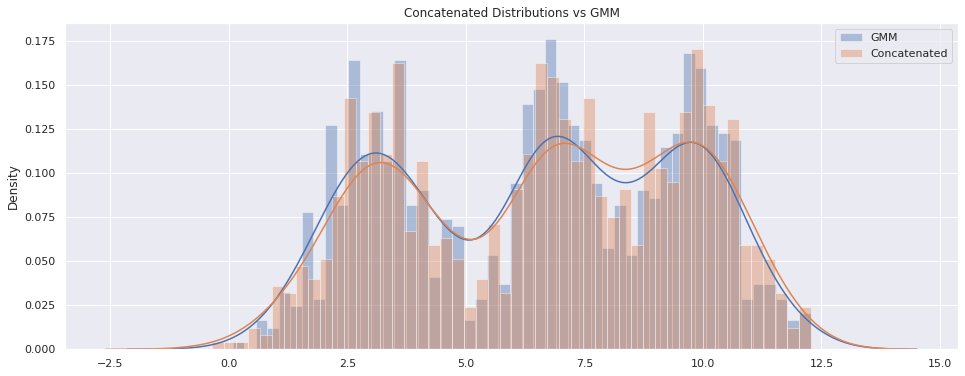

In [52]:
# plot gmm
label_gmm = 'GMM'
label_con = 'Concatenated'
fig = plt.figure(figsize=(16, 6))
sns.distplot(gmm_data, bins=50, label=label_gmm)
sns.distplot(concated_arrays, bins=50, label=label_con)
plt.title('Concatenated Distributions vs GMM')
plt.legend()
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

In [34]:
u = 75000
std = 37500
dist = stats.norm(loc=u, scale=std)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [35]:
a = dist.cdf(50000)

In [36]:
print(f'''The percent is {round((a*100),3)}%''')

The percent is 25.249%


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [37]:
b = dist.cdf(65000) - dist.cdf(45000)

In [38]:
print(f'''The percent is {round((b*100),3)}%''')

The percent is 18.301%


#### 4.C
What percent of people earn more than 85,000 RCU?

In [39]:
c = 1 - dist.cdf(85000)

In [40]:
print(f'''The percent is {round((c*100),3)}%''')

The percent is 39.486%


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [41]:
d = (1 - dist.cdf(140000))*1000

In [42]:
print(f'''{int(d)} employees''')

41 employees


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

$$E(T_{N})=NH(N)$$

In [41]:
#harmonic
def H(n):
    H = 0
    for i in range(1, n+1):
        H = H + 1/i
    return H

In [42]:
def exp_Tn(N):
    return N*H(N)

In [43]:
exp_Tn(100)

518.737751763962

#### 5.B
Write code to compute the exact value of $V(T_{N})$

Since coupon collection are independent, we have:  
$$V(T_{N})=V(X_{1}+X_{2}+...+X_{n})=\sum_{i=0}^{N}V(X_{i})$$  
$$X_{i}\sim G(p), V(X_{i})=\frac{1-p}{p^2},p=\frac{N-i+1}{N}$$  

In [44]:
def var_Tn(N):
    var = 0
    for i in range(1, N+1):
        p=(N-i+1)/N
        var = var + (1-p)/(p)**2
    return var

In [45]:
var_Tn(56)

4844.767973767466

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

$$P(T_{30}>60)=1-P(T_{30}\leq 60)$$  
$$P(T_{30}\leq 60)=P(T_{30}=30)+P(T_{30}=31)+...+P(T_{30}=60)$$  

##### way 1: use mathematical formula to compute $P(T_{N}=k)$, then sum it

In [53]:
#reference https://probabilityandstats.wordpress.com/2017/01/18/how-long-does-it-take-to-collect-all-coupons/
def segma(n, k):
    sum = 0
    for i in range(n-1):
        sum = sum + ((-1)**i) * (math.comb(n-1,i)) * (1-(1+i)/n)**(k-1)
    return sum

In [54]:
#sum P(TN=k)
def TN_greater_k(N, k):
    result = 0
    for i in range(N-1, k+1):
        result = result + segma(N, i)
    return 1-result

In [55]:
#P(T_N > k)
#for P(T_N >= k, k should be added by 1)
print(f'''Probability is {round(((TN_greater_k(30, 60))*100),3)}%''')

Probability is 99.402%


----
##### way 2: use the formula we saw in lecture to compute $P(T_{N}=k)$, then sum it

As what we saw in lecture:  
$$P(T_{N}=k)=\sum_{i=1}^{k-1}P(G_{N}=i)P(T_{N-1}=k-i)$$   
We need redefine the formula as following:
$$P(T_{N,n}=k)=\sum_{i=1}^{k-n+1}P(G_{N,n}=i)P(T_{N,n-1}=k-i)$$  
$$P(T_{N,n-1}=k)=\sum_{i=1}^{k-n}P(G_{N,n-1}=i)P(T_{N,n-2}=k-i)$$  
$P(T_{N,n-1}=k)$ means $N$ different kinds of coupon in total, after picked $k$ times, we got $n-1$ different coupon  
  
$P(G_{N,n}=i)$ means $N$ different kinds of coupon in total, after picked $i$ times for $n-th$ coupon,  
  
which is geometric distribution, $P(G_{N,n}=i)=(1-p)^{i-1}p,p=\frac{N-n+1}{N}$  

In [5]:
#geom: N different kinds of coupon in total, pick k times for the n-th coupon
def geom(N, n, k):
    return stats.geom.pmf(k, (N-n+1)/N)

In [6]:
# N different kinds of coupon in total, pick k times, and have n different kinds of coupon in hand
def PTk_naive(N, n, k):
    if (n == 1) & (k == 1):
        return 1
    elif (n == 1):
        return 0
    else:
        sum = 0
        for i in range (1, k-n+1+1):
            sum = sum + geom(N, n, i) * PTk_naive(N, n-1, k-i)
    return sum

In [7]:
#sum P(TN=k)
def TN_greater_k_naive(N, k):
    result = 0
    n=N
    for i in range(n-1, k+1):
        result = result + PTk_naive(N, n, i)
    return 1-result

In [21]:
%%time
print(f'''Probability of T_10>20 is {round(TN_greater_k_naive(10, 20)*100,3)}%''')

Probability of T_10>20 is 78.526%
Wall time: 30.1 s


###### naive version costs too much running time, cannot do heave calculation, use np.convolve to optimize

In [11]:
# optimize version
# N different kinds of coupon in total, pick k times, and have n different kinds of coupon in hand
def PTk(N, n, k):
    T = np.zeros(k)
    T[0]=1
    k = np.arange(k) + 1
    for i in range (1, n):
        T = np.convolve(geom(N, n-i+1, k), T)
    return T

In [14]:
#sum P(TN=k)
def TN_greater_k(N, k):
    n=N
    return 1-PTk(N,n,k)[:k-n+1].sum()

In [15]:
%%time
print(f'''Probability is {round(((TN_greater_k(30, k=60))*100),3)}%''')

Probability is 99.402%
Wall time: 5.95 ms


---
#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$

We can use the $PTk$ function in second way of 5.C directly by changing $n=N/2$

In [16]:
def SN_greater_k(N, k):
    n=int(N/2)
    return 1-PTk(N,n,k)[:k-n+1].sum()

In [20]:
#because the result is too small, no need use format of round and %
%%time
SN_greater_k(30, 60)

Wall time: 3.99 ms


1.7146284392310918e-12